In [11]:
# %pip install tensorflow

In [1]:
import tensorflow as tf
import os
import cv2
import imghdr
import numpy as np
from matplotlib import pyplot as plt

/var/folders/x_/08j42z3j22377xv4cbjvxw880000gn/T/ipykernel_4320/183779410.py:4: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr
Matplotlib is building the font cache; this may take a moment.


In [2]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 305 files belonging to 2 classes.


In [5]:
# Convert into Numpy iterator
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

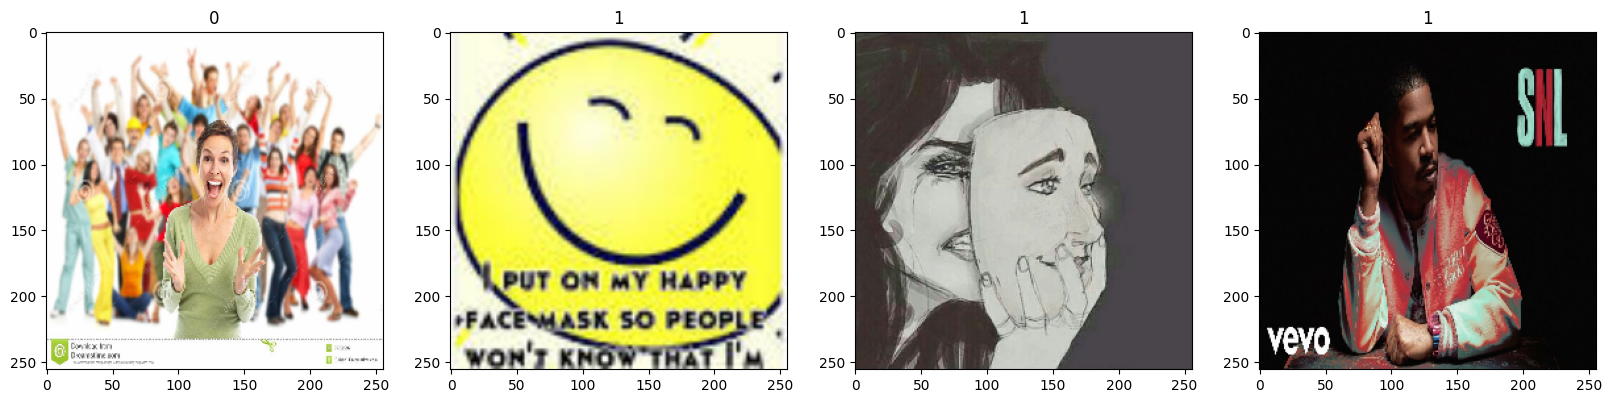

In [7]:
# Plot Images
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [8]:
# Scale the data (Normalization)
data = data.map(lambda x,y: (x/255, y))
data.as_numpy_iterator().next()

(array([[[[0.0870481 , 0.13043046, 0.0755285 ],
          [0.0508004 , 0.09785922, 0.04295726],
          [0.07494638, 0.12984835, 0.07102481],
          ...,
          [0.887343  , 0.89101946, 0.92116654],
          [0.8901961 , 0.89411765, 0.91158473],
          [0.89411765, 0.8901961 , 0.9135608 ]],
 
         [[0.10459942, 0.14828432, 0.08144148],
          [0.08870251, 0.1396829 , 0.07295496],
          [0.09021523, 0.1451172 , 0.08620941],
          ...,
          [0.8877643 , 0.8940985 , 0.91099113],
          [0.89025736, 0.89411765, 0.9019608 ],
          [0.89411765, 0.89411765, 0.9019608 ]],
 
         [[0.13482307, 0.18221508, 0.10087699],
          [0.12175628, 0.17273667, 0.09932981],
          [0.09508655, 0.15095742, 0.0839231 ],
          ...,
          [0.8877451 , 0.89166665, 0.90832186],
          [0.89270836, 0.8936466 , 0.9059858 ],
          [0.89270836, 0.89411765, 0.90477943]],
 
         ...,
 
         [[0.07266391, 0.12072993, 0.08167126],
          [0.09770

In [12]:
# Split into tran, val and test sets
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [14]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

### Build CNN Model

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [16]:
model = Sequential()

model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # Binary classification

/opt/anaconda3/envs/ImageClassification/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
# SGD is better for small dataset
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy']) # adm better for big dataset and image data

In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
# Save to logs
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir='logs')

# Train model
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 388ms/step - accuracy: 0.5166 - loss: 1.0373 - val_accuracy: 0.3906 - val_loss: 0.7128
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 437ms/step - accuracy: 0.5078 - loss: 0.6908 - val_accuracy: 0.5156 - val_loss: 0.6739
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 406ms/step - accuracy: 0.5790 - loss: 0.6740 - val_accuracy: 0.5156 - val_loss: 0.6692
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 397ms/step - accuracy: 0.6952 - loss: 0.6316 - val_accuracy: 0.8281 - val_loss: 0.5704
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 397ms/step - accuracy: 0.7394 - loss: 0.5366 - val_accuracy: 0.7500 - val_loss: 0.5076
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 397ms/step - accuracy: 0.7271 - loss: 0.5455 - val_accuracy: 0.8281 - val_loss: 0.4446
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 379ms/step - accuracy: 0.8496 - loss: 0.4412 - val_accuracy: 0.9219 - val_loss: 0.3808
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 375ms/step - accuracy: 0.8586 - loss: 0.3569 - val_accuracy: 0.7969 - val_loss:

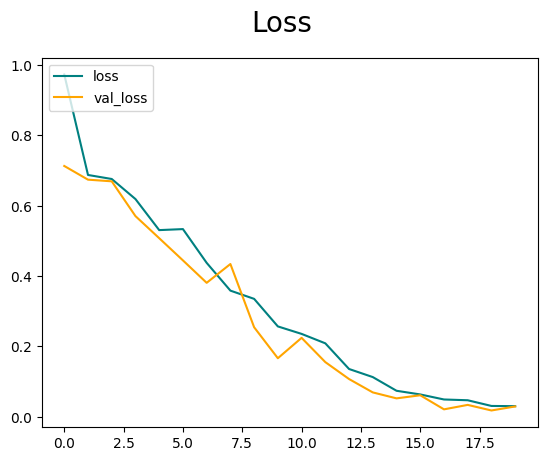

In [25]:
# Check performance on Loss to monitoring overfitting 
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

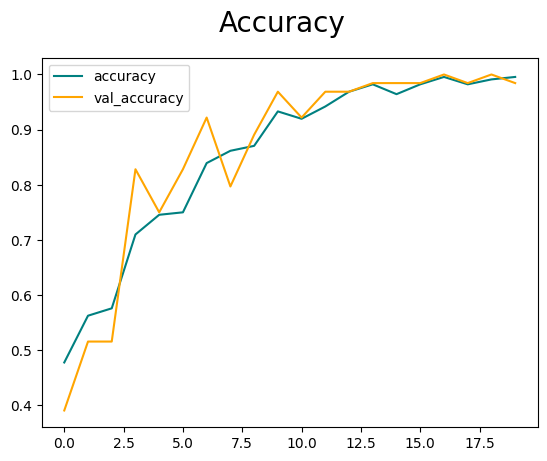

In [27]:
# Accuracy
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

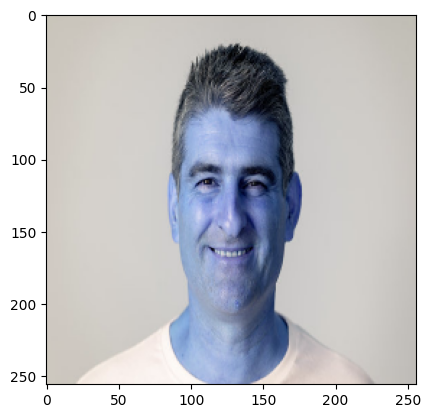

In [34]:
# Test
img = cv2.imread('test.jpg')
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [36]:
yhat = model.predict(np.expand_dims(resize/255, 0)) # Normalize image pixel values ​​to the range [0, 1]
print(yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
[[0.9815744]]


In [37]:
threshold = 0.5
if yhat >= threshold:
    print("The image is predicted to be a happy face.")
else:
    print("The image is predicted to be a sad face.")

The image is predicted to be a happy face.


### Save Model

In [38]:
from tensorflow.keras.models import load_model

In [40]:
model.save('happysad_detection.h5')

_____

### Load the model

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import numpy as np
import matplotlib.pyplot as plt
import cv2

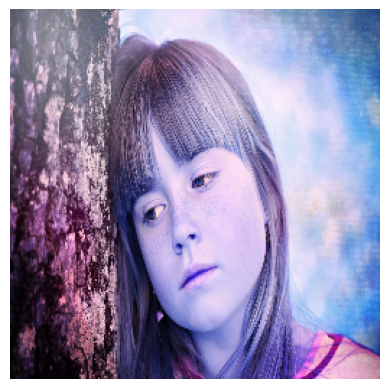

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Prediction: [[0.40884906]]
The image is predicted to be a sad face.


In [6]:
loaded_model = tf.keras.models.load_model('happysad_detection.h5')

img_path = 'test3.jpg'  # Image
img = cv2.imread(img_path)
resize = tf.image.resize(img, (256, 256))

# Resize the image
plt.imshow(resize.numpy().astype(int))
plt.axis('off')  # Hide the axis
plt.show()

input_img = np.expand_dims(resize.numpy() / 255.0, axis=0)
yhat = loaded_model.predict(input_img)

print(f"Prediction: {yhat}")

threshold = 0.5
if yhat >= threshold:
    print("The image is predicted to be a happy face.")
else:
    print("The image is predicted to be a sad face.")